<a id='intro'></a>
## Introduction💛

>  *This report explores the no-show appointments dataset, which collects information from over 100k medical appointments in Brazil. The report's goal is to predict who will not show up for an appointment based on a number of patient attributes.*

> 
 <h3> In this analysis you will find answers to these questions:</h3>
 
1. How many appointments are showing up compared to no-shows? 
2. How does the waiting time between booking and attending the appointment influence attendance? 
3. Is reciveing SMS will affect the attendenc show up rate ?


In [1]:
# Cell all packages that i will use

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, I will load in the data, check for cleanliness, and then trim and clean your dataset for analysis.

### General Properties

In [2]:
# Load your data 
df= pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
# Showing the 5 rows of data
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
#Checking for the data structure
df.shape

(110527, 14)

In [4]:
#Exploring general properties about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


 **What we can get** :
1. Comparing the numbers of rows with counts for each column , we can see there is no null value!
2. There is a typo in the (Handicaps )
3. ScheduledDay - AppointmentDay are columns with the date data type, so we have to change their data type into date 
  * To keep it more simple we may sprate the date from time in those coulmns 
4. PatientId and AppointmentID may also need to change its data type becuse they are not having meaning as intger and to easliy use them , we will converted them to object 
5. To be more consistent with other column's values we may change the No-show values into (0 = No ,1 = Yes) 

In [5]:
#Checking for duplicated values
df.duplicated().sum()

0

In [6]:
#Checking for null values - to make sure 
df.isnull().values.any()

False

In [7]:
#Checking for numbers of patients we have   
df.PatientId.nunique()

62299

In [8]:
#Checking for numbers of Appointments that we have  
df.AppointmentID.nunique()

110527

The number of patients is less than the number of appointments, which means there are duplicates or some patients have more than one appointment.

In [9]:
#Checking for all the types of Neighnourhood 

df.Neighbourhood.unique()

array(['JARDIM DA PENHA', 'MATA DA PRAIA', 'PONTAL DE CAMBURI',
       'REPÚBLICA', 'GOIABEIRAS', 'ANDORINHAS', 'CONQUISTA',
       'NOVA PALESTINA', 'DA PENHA', 'TABUAZEIRO', 'BENTO FERREIRA',
       'SÃO PEDRO', 'SANTA MARTHA', 'SÃO CRISTÓVÃO', 'MARUÍPE',
       'GRANDE VITÓRIA', 'SÃO BENEDITO', 'ILHA DAS CAIEIRAS',
       'SANTO ANDRÉ', 'SOLON BORGES', 'BONFIM', 'JARDIM CAMBURI',
       'MARIA ORTIZ', 'JABOUR', 'ANTÔNIO HONÓRIO', 'RESISTÊNCIA',
       'ILHA DE SANTA MARIA', 'JUCUTUQUARA', 'MONTE BELO',
       'MÁRIO CYPRESTE', 'SANTO ANTÔNIO', 'BELA VISTA', 'PRAIA DO SUÁ',
       'SANTA HELENA', 'ITARARÉ', 'INHANGUETÁ', 'UNIVERSITÁRIO',
       'SÃO JOSÉ', 'REDENÇÃO', 'SANTA CLARA', 'CENTRO', 'PARQUE MOSCOSO',
       'DO MOSCOSO', 'SANTOS DUMONT', 'CARATOÍRA', 'ARIOVALDO FAVALESSA',
       'ILHA DO FRADE', 'GURIGICA', 'JOANA D´ARC', 'CONSOLAÇÃO',
       'PRAIA DO CANTO', 'BOA VISTA', 'MORADA DE CAMBURI', 'SANTA LUÍZA',
       'SANTA LÚCIA', 'BARRO VERMELHO', 'ESTRELINHA', 'FORTE SÃO 

In [10]:
#Checking for numbers of Nieghbouthood 
df.Neighbourhood.duplicated().size

110527

In comparison to the unique values, that means may we have a situation where many patients visit the same place

In [11]:
#Chacking for the max value 
print('This is the most Neighbourhood visted and has many appointments','  /   ' ,df['Neighbourhood'].mode())
print('This is the amount of appointments','   / ', df['Neighbourhood'].value_counts()['JARDIM CAMBURI'])

This is the most Neighbourhood visted and has many appointments   /    0    JARDIM CAMBURI
Name: Neighbourhood, dtype: object
This is the amount of appointments    /  7717


In [12]:
#Showing the general description
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [13]:
#Showing the general description for Neighbourhood because it did not appear above
df['Neighbourhood'].describe()

count             110527
unique                81
top       JARDIM CAMBURI
freq                7717
Name: Neighbourhood, dtype: object

In [14]:
#Showing the general description for Gender because it did not appear above
df['Gender'].describe()

count     110527
unique         2
top            F
freq       71840
Name: Gender, dtype: object

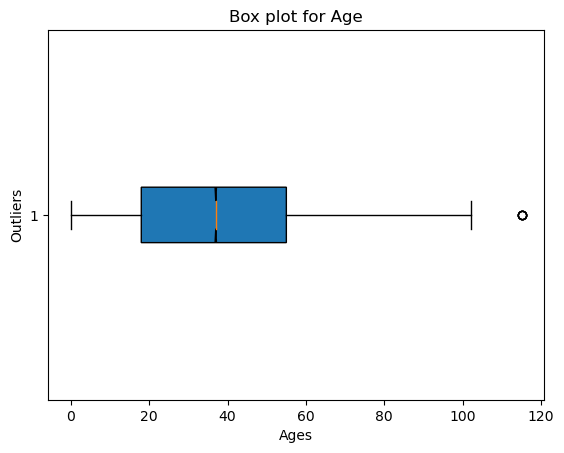

In [65]:
#Checking for the outliers again because we found in above there is Max value =115 , and min value = -1
plt.boxplot(df['Age'],vert=False , patch_artist	= True , notch= True)
# show plot
plt.title('Box plot for Age')
plt.xlabel('Ages')
plt.ylabel('Outliers')
plt.show()

In [16]:
#Checking for patients with less than 0 Age (Maybe 0 means there are newborn, so I will keep them)
df.loc[df['Age'] <0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


 **What we can get** :
* From the statistics descriptive we can summarize that:
   * Age has one or more negative values, so it must be removed because in the logic it is impossible to have Age with -1 
   * Female was the top gender , but we need to convert the data to code (1= F, 0=M) to have more meaning by numbers 
   * The mean age of the patients is 37, and most are between 37-55, which is reasonable because we are more likely to visit a doctor at this age.
   * If we change the type of data to - No show columns - we may be able to investigate further statisticly
   * Approximately 75% of patients received SMS ( SMS = 1), so we need to see how this affects attendance.
   * There is one place that is the most visited, so we need to find out why

> **What coming in the cleaning :**
1. Change some data type 
2. Correct the typo 
3. Change some value type 
4. Delete the outliers 
5. Separate columns
6. Create a helper column

###  Data Cleaning and deep exploring



In [17]:
 # rename typo columns
df.rename(columns={'Handcap': 'Handicap', 'SMS_received': 'SMSReceived', 'No-show': 'Attending'},\
          inplace=True)
# confirm changes
df.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMSReceived,Attending
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


In [18]:
# Will convert ScheduledDay, AppointmentDay  data type so i can extract the date
for x in ['ScheduledDay', 'AppointmentDay']:
    df[x]= pd.to_datetime(df[x])

In [19]:
# Confiem the change
df.head(4)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMSReceived,Attending
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No


In [20]:
# Will extract date to help in further investigation if need it 
for d in ['ScheduledDay', 'AppointmentDay']:
    
   df['Scheduled']= df[d].dt.date
   df['Appointment']= df[d].dt.date

Since we have almost all appointments at the same time as shown in the Appointment Date column, I decided to create new columns for a date only and keep the original in case we need the time.

In [21]:
# Will convert Attending values to 1 and 0 
df['Attending'].replace({'No': 0, 'Yes': 1}, inplace=True)

In [22]:
# Will convert Attending data type
df['Attending']=df['Attending'].astype(int)

The conversion of the values to (0, 1) and the type to an integer will assist in creating more charts and using them for statistical analysis

In [23]:
# Will convert PatientID data type
df['PatientId']=df['PatientId'].astype(int)

Changing the type to an integer will help in the future for instance to know how many appointments each patient has.

In [24]:
#Will drop the one row that has -1 Age
df_Age = df[df['Age'] <0].index # Filter the rows
df.drop(df_Age,inplace=True)

In [25]:
#Checking for Age change 
df.loc[df['Age'] <0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMSReceived,Attending,Scheduled,Appointment


In [26]:
#confirm changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110526 non-null  int32              
 1   AppointmentID   110526 non-null  int64              
 2   Gender          110526 non-null  object             
 3   ScheduledDay    110526 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110526 non-null  datetime64[ns, UTC]
 5   Age             110526 non-null  int64              
 6   Neighbourhood   110526 non-null  object             
 7   Scholarship     110526 non-null  int64              
 8   Hipertension    110526 non-null  int64              
 9   Diabetes        110526 non-null  int64              
 10  Alcoholism      110526 non-null  int64              
 11  Handicap        110526 non-null  int64              
 12  SMSReceived     110526 non-null  int64              
 13  Attending     

In [27]:
#Creating a new column and extract its days only through using  dt 
df['gap_days'] = (df['AppointmentDay']-df['ScheduledDay']).dt.days

To see if the timing difference between a scheduled appointment and the actual appointment affects attendance

In [28]:
#Confirm changes
df.loc[df['gap_days']>1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMSReceived,Attending,Scheduled,Appointment,gap_days
11,-2147483648,5620163,M,2016-04-26 08:44:12+00:00,2016-04-29 00:00:00+00:00,29,NOVA PALESTINA,0,0,0,0,0,1,1,2016-04-29,2016-04-29,2
15,-2147483648,5620206,F,2016-04-26 08:47:27+00:00,2016-04-29 00:00:00+00:00,15,NOVA PALESTINA,0,0,0,0,0,1,0,2016-04-29,2016-04-29,2
18,-2147483648,5621836,F,2016-04-26 10:54:18+00:00,2016-04-29 00:00:00+00:00,30,NOVA PALESTINA,1,0,0,0,0,1,0,2016-04-29,2016-04-29,2
22,-2147483648,5616091,M,2016-04-25 13:29:16+00:00,2016-04-29 00:00:00+00:00,13,CONQUISTA,0,0,0,0,0,1,1,2016-04-29,2016-04-29,3
25,-2147483648,5624020,M,2016-04-26 15:04:17+00:00,2016-04-29 00:00:00+00:00,46,CONQUISTA,0,1,0,0,0,1,0,2016-04-29,2016-04-29,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,-2147483648,5651768,F,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,0,2016-06-07,2016-06-07,34
110523,-2147483648,5650093,F,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,0,2016-06-07,2016-06-07,34
110524,-2147483648,5630692,F,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,0,2016-06-07,2016-06-07,40
110525,-2147483648,5630323,F,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,0,2016-06-07,2016-06-07,40


In [29]:
#confirm changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110526 non-null  int32              
 1   AppointmentID   110526 non-null  int64              
 2   Gender          110526 non-null  object             
 3   ScheduledDay    110526 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110526 non-null  datetime64[ns, UTC]
 5   Age             110526 non-null  int64              
 6   Neighbourhood   110526 non-null  object             
 7   Scholarship     110526 non-null  int64              
 8   Hipertension    110526 non-null  int64              
 9   Diabetes        110526 non-null  int64              
 10  Alcoholism      110526 non-null  int64              
 11  Handicap        110526 non-null  int64              
 12  SMSReceived     110526 non-null  int64              
 13  Attending     

In [30]:
# Checking the helper column
df.query('gap_days < -1').head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMSReceived,Attending,Scheduled,Appointment,gap_days
27033,-2147483648,5679978,M,2016-05-10 10:51:53+00:00,2016-05-09 00:00:00+00:00,38,RESISTÊNCIA,0,0,0,0,1,0,1,2016-05-09,2016-05-09,-2
55226,-2147483648,5715660,F,2016-05-18 14:50:41+00:00,2016-05-17 00:00:00+00:00,19,SANTO ANTÔNIO,0,0,0,0,1,0,1,2016-05-17,2016-05-17,-2
64175,-2147483648,5664962,F,2016-05-05 13:43:58+00:00,2016-05-04 00:00:00+00:00,22,CONSOLAÇÃO,0,0,0,0,0,0,1,2016-05-04,2016-05-04,-2
71533,-2147483648,5686628,F,2016-05-11 13:49:20+00:00,2016-05-05 00:00:00+00:00,81,SANTO ANTÔNIO,0,0,0,0,0,0,1,2016-05-05,2016-05-05,-7
72362,-2147483648,5655637,M,2016-05-04 06:50:57+00:00,2016-05-03 00:00:00+00:00,7,TABUAZEIRO,0,0,0,0,0,0,1,2016-05-03,2016-05-03,-2


It turns out that we have unreasonable values! There can be no less than one day between the appointment and the scheduled for. Assuming that the -1 represents some hours between them, this would make sense, but the data indicates that we have -2 and more.
let us see what this means

<a id='eda'></a>
## Exploratory Data Analysis

> **Note** :Initially, I will try to answer the questions that have already been raised, and we may move into other areas of data analysis. 



In [31]:
# To filter the data more esiry i creted a mask for the attending column 
showed = df['Attending'] == 1
not_showed = df['Attending'] == 0
df['showed'] = showed
df['not_showed'] = not_showed

In order to filter the data more easily, I created a mask for the attending column.
 * Since the main goal of this data set is to explore the pattern and reasons behind the (N0-Show ) attitude 

###  Question 1 

>**How many appointments are showing up compared to no-shows?**


In [32]:
#Check the rate of  the Not_showed 
df['not_showed'].value_counts(normalize=True).mul(100).round().astype(str)+ '%'

True     80.0%
False    20.0%
Name: not_showed, dtype: object

In [33]:
#Check the rate of  the Not_showed 
df['showed'].value_counts(normalize=True).mul(100).round().astype(str)+ '%'

False    80.0%
True     20.0%
Name: showed, dtype: object

First, check the filter. I counted their rate and rounded it and change the type of result to string to write in them % and make it more obvious for the reader.

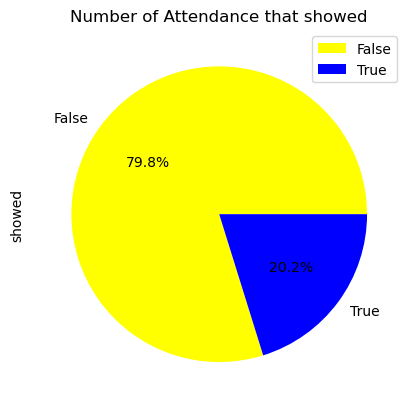

In [34]:
y = df['showed'].value_counts()
colors=['yellow','blue']
y.plot.pie(autopct='%1.1f%%' , colors=colors)
plt.title("Number of Attendance that showed")
plt.legend();
plt.show()

Approximately 20% of the total attendees show up for their appointments. Meanwhile, 80% of people fail to show up for appointments

__Let's see if the attendance is affacting by the Age or Gender__

In [35]:
# The mean Age of the show up vs not
pd.pivot_table(data = df, index = ["Attending"], values = "Age")

,Age
Attending,
0,37.790504
1,34.317667


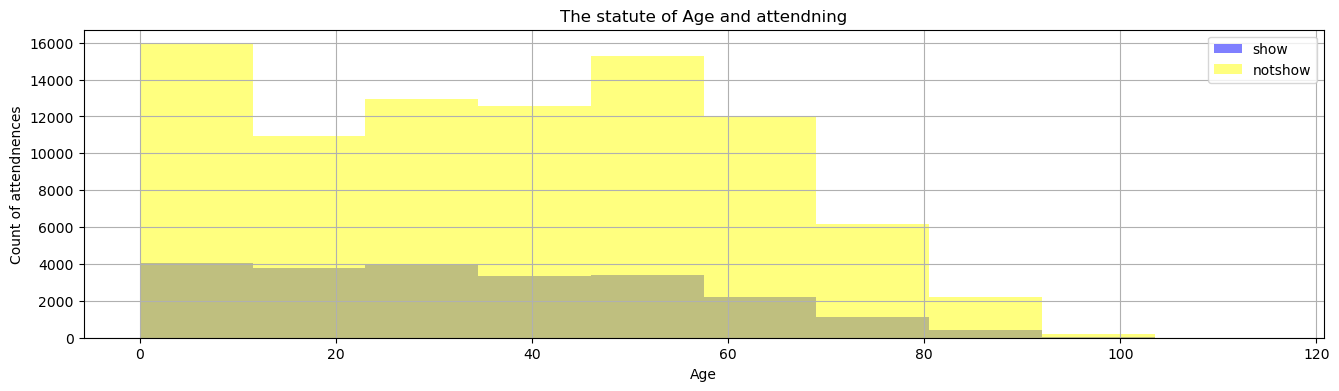

In [36]:
# Visualizing the Age distribution
def attending_hist(df,col,t,x):
    plt.figure(figsize=[16,4])
    df[col][showed].hist(alpha=.5,bins=10,color='blue',label='show')
    df[col][not_showed].hist(alpha=.5,bins=10,color='yellow',label='notshow')
    plt.legend()
    plt.title(t)
    plt.xlabel(x)
    plt.ylabel('Count of attendnences');
attending_hist(df, 'Age',  'The statute of Age and attendning' ,'Age')

Most patients between 0 and 60 are showing for their appointments , whereas those not showing appear more at 0 Aged ,and the whole distribution are fluctuate not in a stable manner. 
However, I believe the number of the group is affected by the sum of the no shown and shown attendees, as well as the number of 0-60 age's attendees, so it will not well impact the attendance or provide a reliable result. 

In [37]:
# Counting the number of patients to check the top ages
df['Age'].value_counts()

0      3539
1      2273
52     1746
49     1652
53     1651
       ... 
98        6
115       5
100       4
102       2
99        1
Name: Age, Length: 103, dtype: int64

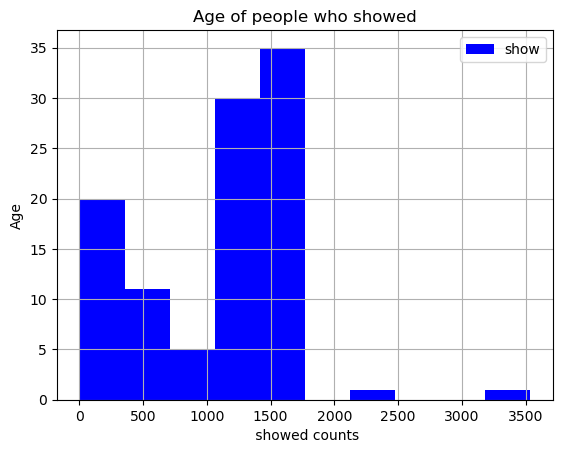

In [60]:
# Checking is true the mean Age of showen up is between 39 >
df.groupby('Age')['showed'].count().hist(bins=10,label='show' , color= 'blue')
plt.xlabel(" showed counts")
plt.ylabel("Age")
plt.title("Age of people who showed")
plt.legend();

Even though older people need more hospital care, the smaller age group seems to care and show up more often 

__#Find the Gender relation__

In [39]:
# Show the mean Age of female 
df.Age[df['Gender']=='F'].mean()

38.894541961887

In [40]:
# Show the mean Age of male
df.Age[df['Gender']=='M'].mean()

33.73686251195492

In [41]:
# Getting the mean age of the genders who show up for their appointments 
G_showed = pd.pivot_table(data = df, index = ["Gender"], values = 'showed',aggfunc = np.mean)
round(G_showed * 100, 2)

,showed
Gender,
F,20.31
M,19.97


In [42]:
# Getting the mean age of the genders who  don't show up for their appointments
G_not_showed = pd.pivot_table(data = df, index = ["Gender"], values = "not_showed",aggfunc = np.mean)
round(G_not_showed  * 100, 2)

,not_showed
Gender,
F,79.69
M,80.03


**Note**:I used the pivot because I wanted to summarize one numerical data based on a categorical/object data type

In general, males seems to show up less than females with a smelest diffrence between them. I don't think Gender has a relation with attending the appontnments . Even though i was expacting Females to show more than males.
- Considering that males have a lower mean age than females, they should be showing up to appointments less than females, since the older we get, the more appointments we have

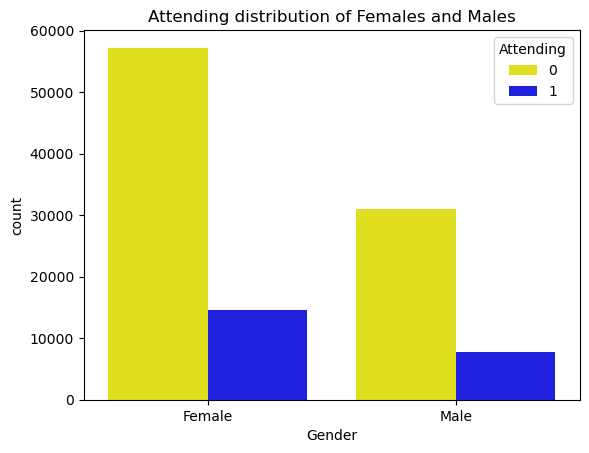

In [43]:
# Used seaborn library because it more appropriate to represent the categorical/object data
Att = sns.countplot(x=df.Gender, hue=df.Attending,data=df, palette=['yellow',"blue"])
Att.set_title("Attending distribution of Females and Males")
x_ticks_labels=['Female', 'Male']
Att.set_xticklabels(x_ticks_labels)
plt.show()

Despite the fact that the mean age of females is more than the mean age of males, the females are less likely to attend than the males. There is a possibility that this affected  by the total number of females compared to males  

In [44]:
#Checking the total numbers of Gender
df.Gender.value_counts()

F    71839
M    38687
Name: Gender, dtype: int64

>**The answer:** 

Nearly 79.8% of patients who schedule appointments do not show up, regardless of their age or gender. The only problem is that it seems there are a number of females with negative attitudes toward attending, despite the fact that they have an average age of 38, so they should attend more, but for some reason they don't, possibly due to family commitments.


###  Question 2
>**How does the waiting time between booking and attending the appointment influence attendance?**


**Note** : Before answering the question, I created bins and divided the gap days into subgroups.
In order to make it easier to visualize

In [45]:
df["gap_days"] = pd.cut(df["gap_days"], 10, labels = ["0-17", "18-34", "35-53", "54-71", "72-89", "90-106", "107-124", "125-142", "143-160", "161-179"])

In [46]:
# Check the change
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110526 non-null  int32              
 1   AppointmentID   110526 non-null  int64              
 2   Gender          110526 non-null  object             
 3   ScheduledDay    110526 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110526 non-null  datetime64[ns, UTC]
 5   Age             110526 non-null  int64              
 6   Neighbourhood   110526 non-null  object             
 7   Scholarship     110526 non-null  int64              
 8   Hipertension    110526 non-null  int64              
 9   Diabetes        110526 non-null  int64              
 10  Alcoholism      110526 non-null  int64              
 11  Handicap        110526 non-null  int64              
 12  SMSReceived     110526 non-null  int64              
 13  Attending     

Text(0.5, 1.0, 'Histogram ')

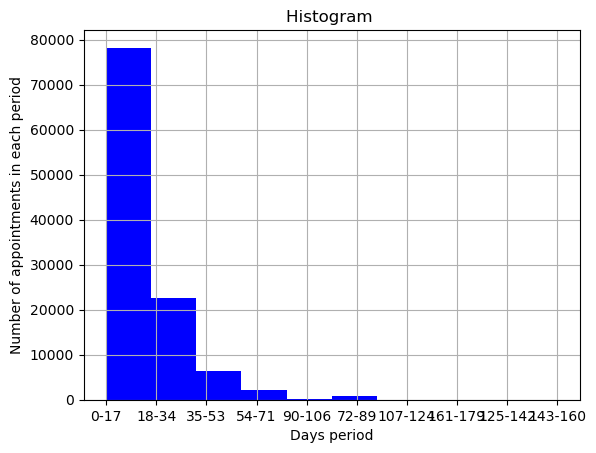

In [63]:
# Creating hist to definded the frequency of days between them 
df['gap_days'].hist(color='blue')
plt.xlabel('Days period')
plt.ylabel('Number of appointments in each period')
plt.title('Histogram ')

The distribution is right-skewed and most appointments occur within the 53 days. Let's see how this affects attendance.
- What is the tendency of people showing up for appointments during that period?

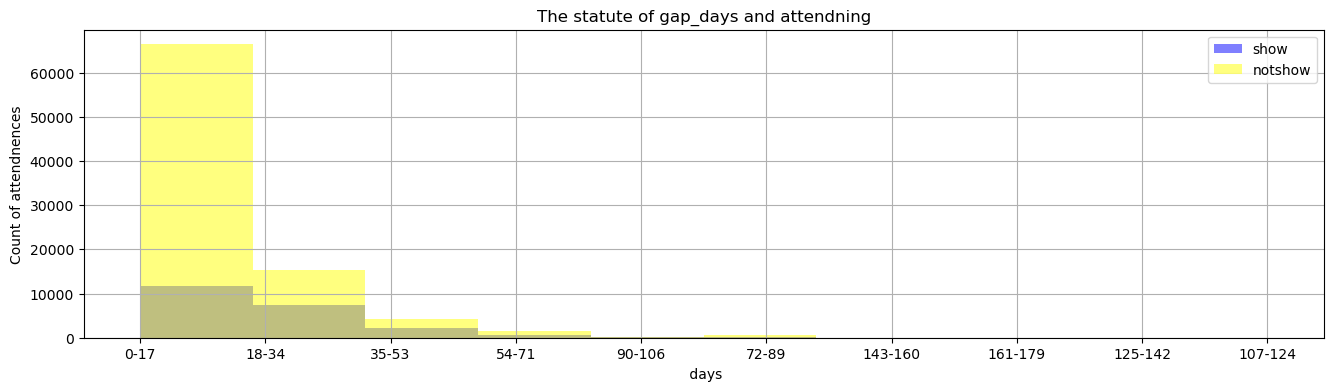

In [48]:
#Createing a hist to show the affects on attendance 
attending_hist(df, 'gap_days','The statute of gap_days and attendning' ,' days')

Unfortunately, most of them did not attend the appointment!

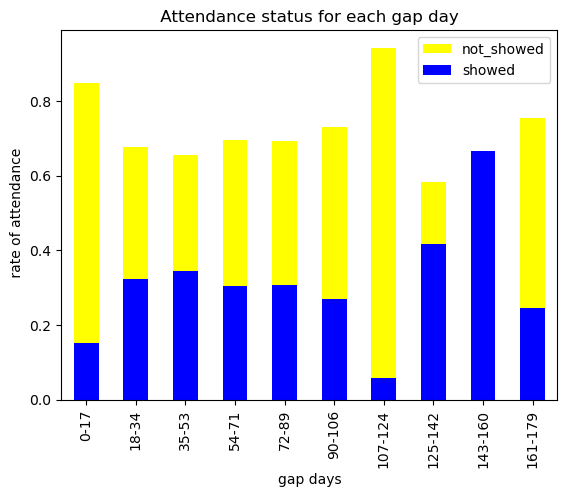

In [69]:
#Create a bar chart to see when they usually attend and not? If they schedule it before during or around the appointment?
def bar_plot(col, Tit,X,Y):
    df.groupby(col).not_showed.mean().plot(kind='bar',color='yellow' ,stacked=True)
    df.groupby(col).showed.mean().plot(kind='bar',color='blue',stacked=True)
    plt.legend()
    plt.title(Tit)
    plt.xlabel(X)
    plt.ylabel(Y)
    plt.show();
bar_plot('gap_days'," Attendance status for each gap day ", 'gap days', ' rate of attendance')

We can find that if they scheduled the appointment before hours or 17 days they mostly will not show up , on other hand if they scheduler before 143-160 days they mostly will show up

In [50]:
# Checking the totall numbers of each gap period and group( who show up , do not)
df.groupby(df['Attending'],as_index=False)['gap_days'].value_counts()

,Attending,gap_days,count
0,0,0-17,66398
1,0,18-34,15308
2,0,35-53,4189
3,0,54-71,1537
4,0,72-89,538
5,0,90-106,152
6,0,161-179,34
7,0,107-124,33
8,0,125-142,14
9,0,143-160,4


In [51]:
df.groupby("gap_days").mean()['showed']


gap_days
0-17       0.150725
18-34      0.323792
35-53      0.345059
54-71      0.304525
72-89      0.306701
90-106     0.269231
107-124    0.057143
125-142    0.416667
143-160    0.666667
161-179    0.244444
Name: showed, dtype: float64

In [52]:
df.groupby("gap_days").mean()['not_showed']

gap_days
0-17       0.849275
18-34      0.676208
35-53      0.654941
54-71      0.695475
72-89      0.693299
90-106     0.730769
107-124    0.942857
125-142    0.583333
143-160    0.333333
161-179    0.755556
Name: not_showed, dtype: float64

>**The answer:** 

I think the pattern are not stable because we have some of them attended and take more than 100 days between the scheduled and  appointment , and other are take only some of days and still can not make it.

###  Question 3
>**Is reciveing SMS will affect the attendenc show up rate ?**


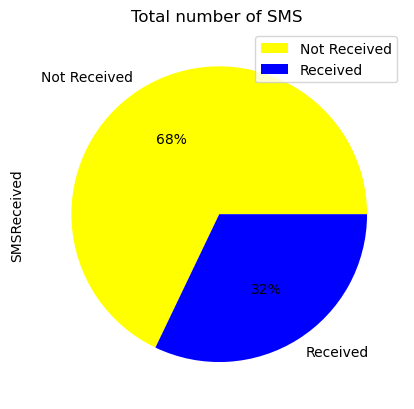

In [53]:
# Visualizing the total number of SMS receiving 
df['SMSReceived'].value_counts().plot(kind="pie",labels=["Not Received","Received"],autopct='%1.0f%%',colors=colors )
plt.title("Total number of SMS ")
plt.legend();

As we can see the majority is not receiving any SMS which is not a good sign for the organization's operation. Will this affect the percentage of attending patients?

In [54]:
#Calculating the count for each patient who is showing up (1)or not showing up for their appointments to see how the SMS affects the attitude of the attending
df.groupby("SMSReceived",as_index=False)['Attending'].value_counts()

,SMSReceived,Attending,count
0,0,0,62509
1,0,1,12535
2,1,0,25698
3,1,1,9784


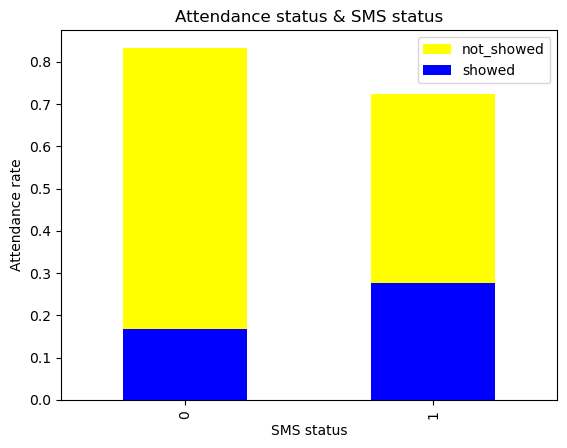

In [70]:
# Creating a bar chart to see the relation between SMS sending and attending
bar_plot('SMSReceived', 'Attendance status & SMS status','SMS status', 'Attendance rate')

Text(0.5, 1.0, 'relation between SMS_recievers and patients who showed')

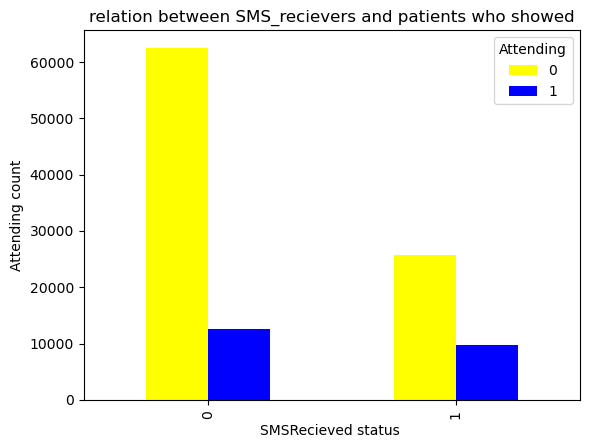

In [71]:
#This other way to show the relation 
df['Attending'].groupby(df['SMSReceived']).value_counts().unstack().plot( kind='bar', stacked=False, color=['yellow','blue'])
plt.ylabel("Attending count")
plt.xlabel("SMSRecieved status ")
plt.title("relation between SMS_recievers and patients who showed")

We can find out there is no difference between sending SMS or not. Only when we take the sum of who received SMS  into consideration, we will find that most patients who received an SMS made it to the appointment

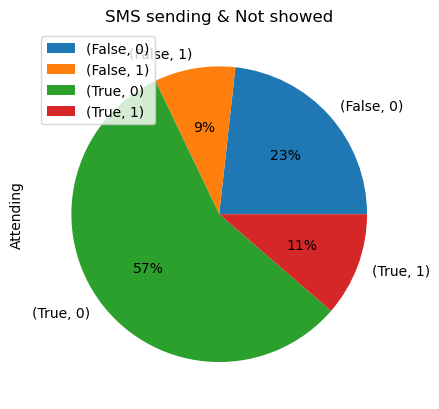

In [57]:
#This is only to confirm the impact of SMS sending on showing up for their appointments

df['Attending'].groupby(df['SMSReceived']==0).value_counts().plot(kind="pie", autopct='%1.0f%%')
plt.title("SMS sending & Not showed")
plt.legend();

Almost 57% out of 68% them don't receive any SMS and still not attending

>**The answer:** 

On the whole, the data isn't providing us with enough information to decide, but if we compare the sending rate with itself, we will find that most of them attended.

<a id='conclusions'></a>
## Conclusions

1.  Nearly 80% of patients do not attend their appointments 
  - The mean Age of those who showed is 34.317667
2.  Younger patients are more likely to commit on attending appointments 
  - Males in the dataset have a mean age of 34, which is younger than females.
  - Almost from 15 to mid-30s are more likely to show up to their appointments.
3.  The dataset contains a higher percentage of females, and females are more likely to commit to the appointment than males
4.  There is no correlation between gender / Age alone and missing the appointment.
5.  Most of the patients scheduled their appointment within 0-17 days of their actual appointments. Many of them failed to show up.
6.  Attendings show inconsistent responses to the gap between the actual appointment and the schedule appointment.. 
7.  Receiving an SMS did not increase the chance that the patient would show up to their appointment.
However, if we look at the total number of SMS sent to patients , it seems most of them show up for their appointments

<a id='conclusions'></a>
## Limitations

- There are some mistakes for instance the time of the appointment shows for all 00
- The dataset covers a short period so it will affect finding pattern 
- The dataset didn't provide many complementary features 
- **Such as** :
- The time of sending SMS, may it will affect the attendees 
- The reasons for the appointments 
- The medical history to see its correlation with Age and attending 